In [2]:
import pandas as pd

df = pd.read_csv("data3.csv")

In [4]:
columns = ['revenue expenditure', 'capital expenditure',
       'total expenditure', 'agriculture expenditure',
       'rural development expenditure', 'energy expenditure',
       'industry and minerals expenditure', 'transport expenditure',
       'internal debt', 'GDP'
       , 'FDI', 'govt debt']

EDA

*1.Descrptive statistics*

In [13]:
#describe all excpet year column

df_key_variables = df[columns]

df_key_variables.describe()

,revenue expenditure,capital expenditure,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,transport expenditure,internal debt,GDP,FDI,govt debt
count,54.000000,54.000000,54.000000,32.000000,32.000000,32.000000,32.000000,32.000000,44.000000,54.000000,54.000000,54.000000
mean,97.394239,19.557886,137.036704,2.945750,5.320344,15.945156,4.446125,12.093594,440.076727,925.717593,14.020296,480.091555
std,115.282210,21.521450,147.337718,2.101976,4.660242,10.611203,2.606142,10.213183,482.546043,1022.553756,19.403935,542.284850
min,3.735084,2.783482,7.499000,1.607000,0.216000,4.864000,1.585000,3.585000,39.267000,62.420000,0.005633,23.834143
25%,16.254089,8.205684,35.988500,1.758750,3.006250,8.960500,2.308750,5.075500,81.696500,213.500000,0.074887,85.353368
50%,35.388857,10.674544,62.039500,2.109000,3.317000,10.266000,3.826500,6.316500,201.730500,404.500000,2.298067,194.606407
75%,160.526457,24.425708,249.275500,3.142250,6.770750,26.144000,6.470500,18.710250,715.747500,1595.000000,28.019200,835.167164
max,420.222702,120.105711,549.560000,10.067000,17.590000,42.589000,11.326000,36.505000,1814.806000,3737.000000,64.323929,2133.827000


Key inferences:
1. The mean and standard deviation values indicate significant variability in revenue and capital expenditures.
2. Internal debt and government debt show substantial ranges, with internal debt ranging from 39.26 to 1814.80 and government debt ranging from 23.83 to 2133.83.

*2. Time Series Plots*

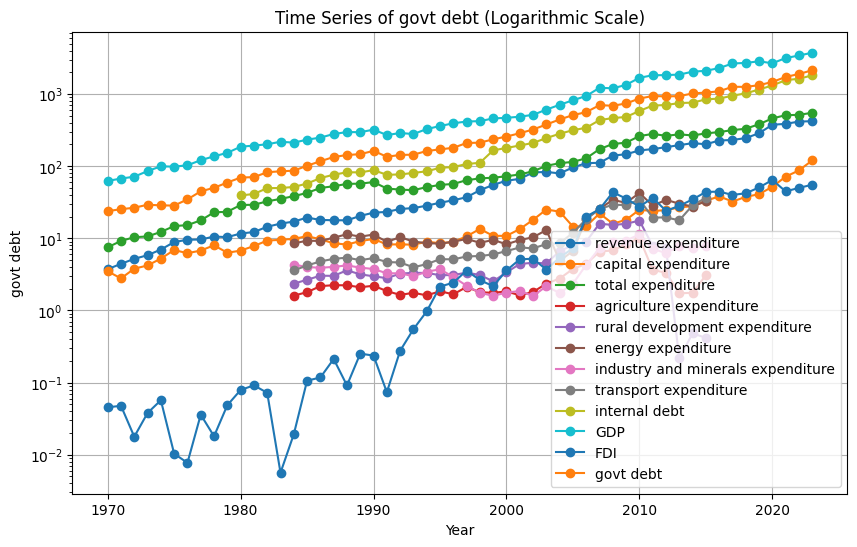

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot time series for each key variable logarithmic
for column in df_key_variables.columns:
    plt.semilogy(df['year'], df[column], marker='o')
    plt.title(f'Time Series of {column} (Logarithmic Scale)')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.grid(True)
    # plt.plot(df['year'], df[column], marker='o')
    # plt.title(f'Time Series of {column}')
    # plt.xlabel('Year')
    # plt.ylabel(column)
    # plt.grid(True)
plt.legend(df_key_variables.columns)
plt.show()

Key inferences
1. The time series plot shows an exponential increase in government debt from 1970 to 2022.
2. Key periods of growth in government debt are observed around the early 1990s and post-2000s, with a significant rise around 2020.
3. This increase is consistent across various expenditure categories, indicating an overall rise in government spending.

*3. Correlation Analysis and Heatmap*

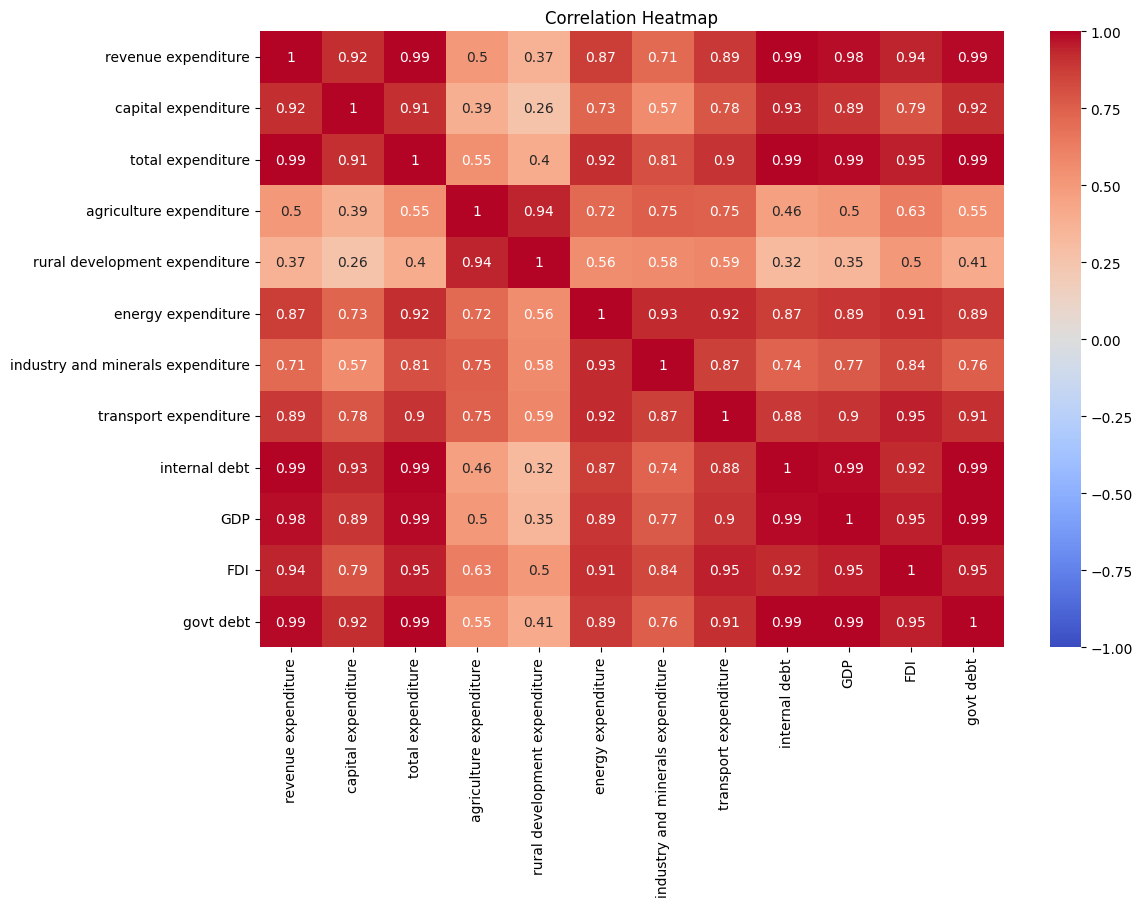

In [7]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_key_variables.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Key inferences:
1. There is a very high correlation (close to 1) between various types of expenditures and government debt, indicating that as expenditure increases, government debt also increases.
2. Revenue expenditure, capital expenditure, total expenditure, and internal debt have the highest correlations with government debt.
3. GDP and FDI also show high correlations with government debt, indicating that as the economy grows, so does the debt.

*4. Composition of government expenditure over time*

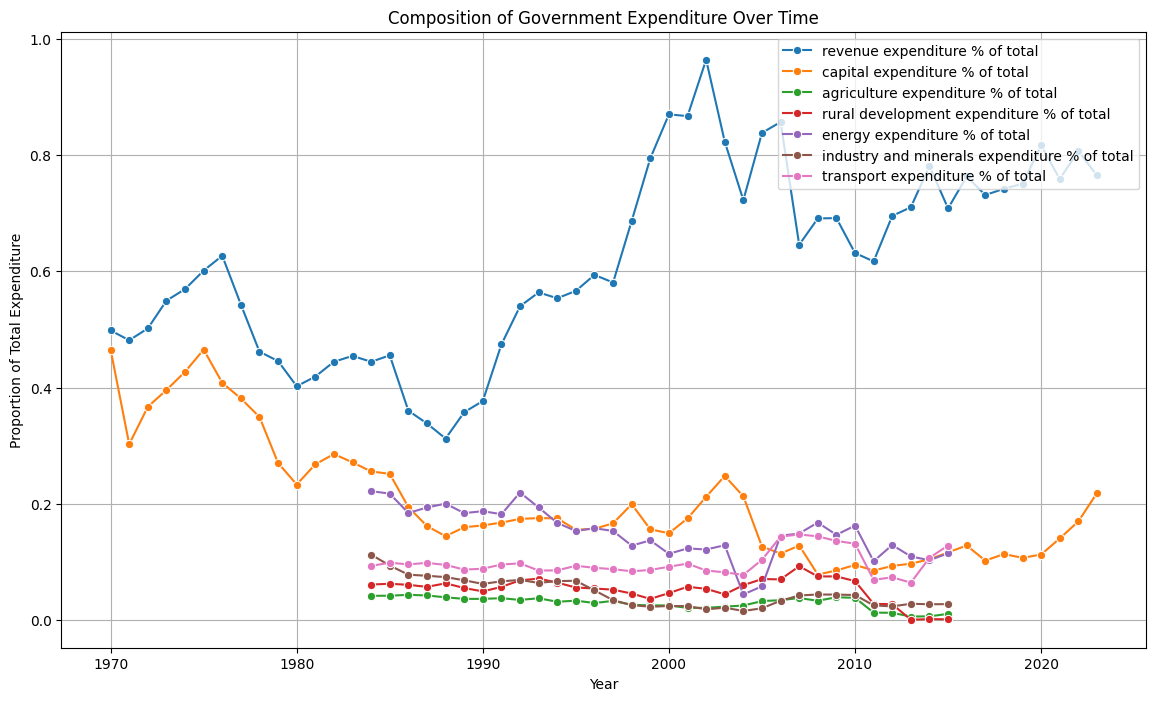

In [8]:
# Calculate the proportion of each expenditure type over total expenditure
expenditure_columns = ['revenue expenditure', 'capital expenditure', 'agriculture expenditure', 
                       'rural development expenditure', 'energy expenditure', 
                       'industry and minerals expenditure', 'transport expenditure']

# Normalize expenditure columns by total expenditure
for column in expenditure_columns:
    df[f'{column} % of total'] = df[column] / df['total expenditure']

# Plot the composition over time
df_plot = df.melt(id_vars=['year'], value_vars=[f'{col} % of total' for col in expenditure_columns],
                  var_name='Expenditure Type', value_name='Proportion')

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_plot, x='year', y='Proportion', hue='Expenditure Type', marker='o')
plt.title('Composition of Government Expenditure Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Total Expenditure')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Key inferences:
1. The composition plot reveals that revenue expenditure constitutes the largest proportion of total government expenditure throughout the years.
2. Capital expenditure shows a fluctuating but generally increasing trend.
3. Other expenditures such as agriculture, rural development, energy, industry and minerals, and transport expenditures remain relatively lower but stable over the years.

*5. Trends in FDI, government debt, and GDP*

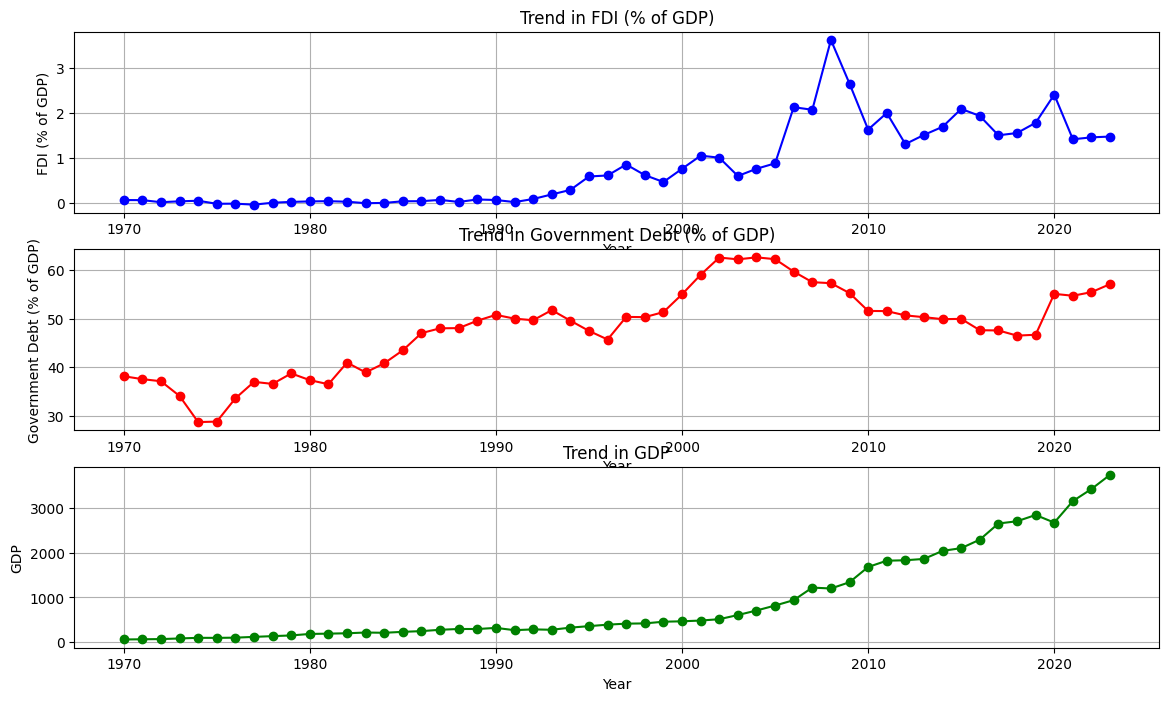

In [12]:
# Plot trends for FDI, government debt, and GDP
plt.figure(figsize=(14, 8))

# FDI trend
plt.subplot(3, 1, 1)
plt.plot(df['year'], df['FDI in % of GDP'], marker='o', color='blue')
plt.title('Trend in FDI (% of GDP)')
plt.xlabel('Year')
plt.ylabel('FDI (% of GDP)')
plt.grid(True)

# Government debt trend
plt.subplot(3, 1, 2)
plt.plot(df['year'], df['govt debt in % of GDP'], marker='o', color='red')
plt.title('Trend in Government Debt (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Government Debt (% of GDP)')
plt.grid(True)

# GDP trend
plt.subplot(3, 1, 3)
plt.plot(df['year'], df['GDP'], marker='o', color='green')
plt.title('Trend in GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)

Key Inferences:
1. FDI (% of GDP) shows fluctuations, with notable peaks around 2010 and 2020.
2. Government debt as a percentage of GDP increased significantly during the 1980s and 2000s, with a peak around 2020.
3. GDP shows a continuous increase over the years, highlighting economic growth.

Overall Summary from the EDA:
The analysis demonstrates a consistent increase in government debt over the past decades, driven largely by increases in various government expenditures. High correlations between different types of expenditures and government debt suggest that managing expenditures could be key to controlling debt levels. The significant increase in GDP and fluctuating FDI trends reflect broader economic dynamics. This analysis provides a comprehensive overview of the government's fiscal health and spending patterns, highlighting the need for sustainable expenditure management to ensure long-term economic stability.